In [878]:
import AAnet
import network
import numpy as np
import AAtools
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
import tensorflow as tf
import time
import pickle
from sklearn.decomposition import PCA
from PCHA import PCHA
from scipy.spatial import procrustes

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
def sample_at_uniform(num_at, n):
    u = np.random.uniform(0,1,[n,num_at])
    e = -np.log(u)
    x = e / np.sum(e, axis=1, keepdims=True)
    return x

In [1027]:
n = 10000
nat = 3
ndim = 100
z = np.random.uniform(size=[n,nat])
z = np.log(z)
z = z / np.sum(z, axis=1, keepdims=True)
#z = z**1.5
#z = z**0.3
z = z**0.25
at = np.random.uniform(size=[nat,ndim])
data = z @ at
#minval = np.min(data)
#data = data - minval
#at = at - minval
#maxval = np.max(data)
#data = data / maxval
#at = at / maxval
#data = (data * 2) - 1
#at = (at * 2) - 1
data.shape

(10000, 100)

In [1028]:
pca = PCA(n_components=ndim)
Y_pca_at = pca.fit_transform(at)
Y_pca = pca.transform(data)

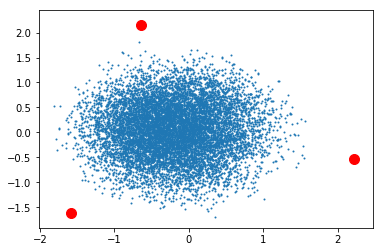

In [1029]:
# plot PCA
plt.scatter(Y_pca[:,0], Y_pca[:,1], s=1)
plt.scatter(Y_pca_at[:,0], Y_pca_at[:,1], s=100, c='r')
plt.show()

In [1001]:
# params
num_at = 3
noise_z_std = 0.04
z_dim = [100,100,100,100]
#z_dim = [] # linear AA
#act_out = tf.nn.tanh
act_out = None # linear last layer
input_dim = data.shape[1]

In [1002]:
# network
enc_net = network.Encoder(num_at=num_at, z_dim=z_dim)
dec_net = network.Decoder(x_dim=input_dim, noise_z_std=noise_z_std, z_dim=z_dim, act_out=act_out)
model = AAnet.AAnet(enc_net, dec_net)

In [1003]:
# train
model.train(data, batch_size=128, num_batches=5000)

Iter [       0] Time [0.2794] loss [1.1081]
Iter [     500] Time [1.7842] loss [0.0078]
Iter [    1000] Time [3.3024] loss [0.0036]
Iter [    1500] Time [4.7817] loss [0.0006]
Iter [    2000] Time [6.2657] loss [0.0014]
Iter [    2500] Time [7.8301] loss [0.0019]
Iter [    3000] Time [9.3108] loss [0.0006]
Iter [    3500] Time [10.7824] loss [0.0011]
Iter [    4000] Time [12.2760] loss [0.0001]
Iter [    4500] Time [14.0203] loss [0.0011]
Iter [    4999] Time [15.7567] loss [0.0005]
done.


In [1004]:
loss_data = model.compute_loss(data)
print('loss: %.4f' % loss_data)

loss: 0.0005


In [1005]:
# error
AAnet_at = model.get_ats_x()
_,_,MSE = procrustes(AAnet_at.T, at.T)
print('MSE = %f' % MSE)

MSE = 0.025915


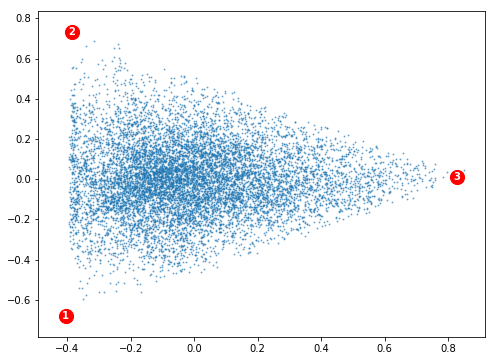

In [1006]:
model.plot_at_pca_single(data)

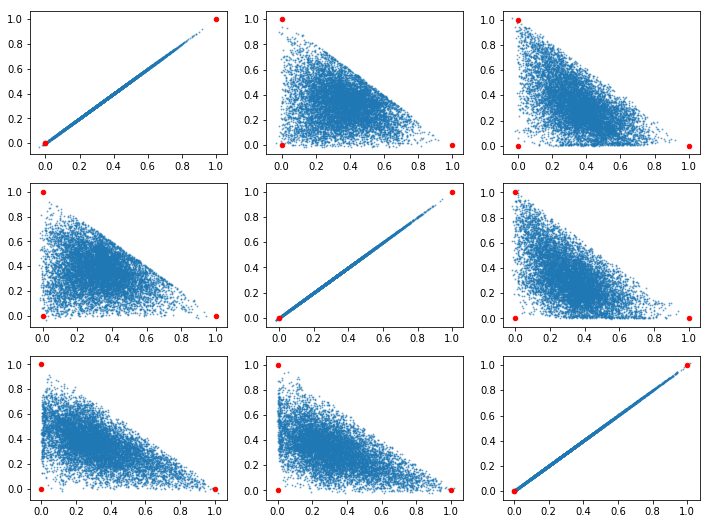

In [1007]:
model.plot_at(data)

In [997]:
# PCHA
XC, S, C, SSE, varexpl = PCHA(data.T, noc=3)

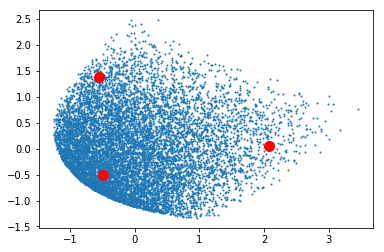

In [998]:
pca = PCA(n_components=3)
Y_pca = pca.fit_transform(data)
Y_pca_at = pca.transform(XC.T)
plt.scatter(Y_pca[:,0], Y_pca[:,1], s=1)
plt.scatter(Y_pca_at[:,0], Y_pca_at[:,1], s=100, c='r')
plt.show()

In [999]:
# error
_,_,MSE = procrustes(XC, at.T)
print('MSE = %f' % MSE)

MSE = 0.302302


In [1008]:
# error both
_,_,MSE = procrustes(at.T, XC)
print('MSE PCHA = %f' % MSE)
AAnet_at = model.get_ats_x()
_,_,MSE = procrustes(at.T, AAnet_at.T)
print('MSE AAnet = %f' % MSE)

MSE PCHA = 0.302302
MSE AAnet = 0.025915
